# 时间序列模型

## 时间序列数据



## AR模型

### AR模型的基本概念

- AR模型，即自回归模型（Autoregressive Model），是一种被广泛用于分析时间序列数据的统计模型。

- 通俗的理解一下：自回归模型，顾名思义，就是使用一个变量的过去值来预测其未来值的模型。简单来说，它就是假设你明天的状态，或者一个序列的下一项，会依赖于今天，或者前面几项的状态。例如，明天的天气可能会受到今天天气的影响，股票的明天价格可能会受到过去几天价格的影响。

- 一个关键点是，自回归模型假设过去的值与未来的值之间存在线性关系。也就是说，它假设你能通过给过去的值加权求和来预测未来的值，这些权重就是模型的参数。
### AR模型的前提假设

- 时序依赖性：在AR模型中，我们假设不同时间点的标签值之间存在强相关性。这意味着一个给定时间点的标签值受到其过去的标签值的显著影响。在数学上，这表现为两个时间点的标签值之间的相关系数较大。换言之，过去的信息对预测未来具有重要影响。

- 时序衰减：另一个基础假设是，两个时间点之间的距离越远，他们之间的关联性越弱。例如，昨天的天气可能对今天的天气影响很大，但三个月前的某一天的天气，对今天的天气的影响就相对微弱。

- 基于这两个假设，AR模型将时间点之间的关系建模为：一个时间点的标签值可以由其过去某个时间段内的所有标签值的线性组合表示。这个线性组合可以理解为对过去信息的加权求和，每个过去时间点的信息都通过一个相应的权重（在AR模型中，这个权重是模型参数）来反映其对当前时间点的影响。公式体现如下：

- $Y_t=c+\phi_1Y_{t-1}+\phi_2Y_{t-2}+...\phi_pY_{t-p}+\xi_t$ 这是一个标准的AR模型的数学表示，其中p代表所使用的时间滞后（lags）的数量

- $Y_t$ 是当前时间点t的时间序列值。也就是在时间点t时的标签
- $c$ 表示模型的常数项，也称为截距项。
- $\phi_1Y_{t-1}, \phi_2Y_{t-2}， ..., \phi_pY_{t-p}+\xi_t$ 这些项表示过去的p个时间点的时间序列值对当前时间点的影响，$\phi_i$表示第i个滞后项的系数，代表了第1个滞后项对当前时间点的相对影响力，$Y_{t-i}$则是在时间点t-i的时间序列值。
- $\xi_t$ 是一个白噪声项，表示模型的误差项。在标准的AR模型中，最严格的情况下，只有均值为0、方差为特定$\sigma^2$、服从正态分布的才能被称之为白噪声

- AR模型（自回归模型）主要应用于时间序列数据。它的基本假设是，一个时间点的观测值可以由其历史观测值线性表示。这意味着AR模型假设当前的时间序列值由过去的值以及一个误差项（通常假设为白噪声）决定。例如，今天的股票价格可能与过去几天的价格相关。

- 多元线性回归模型，与此不同，主要用于截面数据或面板数据，它假设因变量可以由一组自变量线性表示，自变量之间没有严格的时间顺序。例如，房价可能被建筑面积、卧室数量、地理位置等因素影响

- 在这两种模型中，时间的顺序和依赖性在AR模型中起着关键作用，而在多元线性回归中通常不考虑。 多元线性回归假设自变量之间互相独立，即不存在多重共线性。而在AR模型中，由于历史观测值之间可能存在时间依赖性，这一假设通常不成立。AR模型与多元线性回归模型在形式上相似，但在实际应用和假设上有很大区别。选择哪种模型取决于你的数据类型和你的研究问题。

### AR模型的建模流程

- 一个自回归模型只能得出一个样本的结果。因此，使用AR完成一个时间序列预测，是需要建立多个AR模型的。因此在自回归模型中，我们需要不断地建模来求解“下一个”时间点上的数值，以构成序列数据

- AR( p )模型模型在时间区间[0,t]上进行训练，在时间区间[t+1,t+m]上进行预测，t为现在的时间点，则有：
![image 1](1.png)
- 测试求解后面m个值 

![image 2](2.png)
- p 是自回归模型中的参数，它表示在预测当前时刻的值时，我们将考虑过去多少个时刻的值。在AR( p )模型中，p 就是我们要使用的时间滞后的数目。这个参数的选取通常是基于实际数据和模型的性能。通常，我们会尝试不同的 p 值，并使用交叉验证，或者基于模型预测能力的一些信息准则（如AIC，BIC）来选择最佳的 p。

- 在测试阶段，等号右边的Y有时是真实值，有时是预测值，这是因为当我们预测未来的时候，我们可能没有未来的真实值，所以不得不使用之前的预测值作为输入。具体来说，如果我们要预测时间t+1的值，我们可以使用到时间t为止的所有真实值；但是如果我们要预测时间t+2的值，我们就没有时间t+1的真实值，所以我们必须使用我们在时间t+1的预测值。这个过程将持续下去，因此，越往未来预测，我们依赖的预测值就越多。这也就是为什么我们说，时间序列预测中的误差会随着时间的推移而累积。

## MA模型

### MA模型的基本概念

- 移动平均模型（MA模型）是时间序列分析中的一种模型，它描述的是当前时间点的数据与过去噪声的关系。严格定义上来讲：其模型的定义是基于白噪声序列的假设。白噪声是一种特殊的时间序列模型，每个时间点的数据都是独立且服从相同分布的，且具有常数的均值和方差。
-给定一个白噪声序列$\epsilon_t$,MA模型定义为：
- $Y_t=\mu+\epsilon_t+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_q\epsilon_{t-q}$ 这一公式被称为q阶的移动平均模型，写作MA(q)
-  $Y_t$ 是当前时间点t的时间序列值。也就是在时间点t时的标签
-  $\mu$ 是时间序列的均值或期望值，这个值对所有的时间点都是相同的。在许多实际的时间序列分析中，我们假设时间序列已经通过某种方式（例如，通过差分或去趋势）转换为均值为零的序列。但在完整的MA模型中，这个均值项μ是存在的
- $\epsilon_t$ 这些是所谓的白噪声项，每个时间点的值都是独立同分布的，通常假设为正态分布。在标准的MA模型中，白噪声误差项是相互独立的，均值为0，方差为$\sigma^2$，服从正态分布.$\epsilon_t$是当前时刻的白噪声，$\epsilon_{t-1}$是上一个时刻的白噪声，以此类推
- $\theta_1，\theta_2，...\theta_q$ 这些是MA模型的参数，每个参数θ都对应于一个白噪声项。它们衡量的是对应的白噪声对当前时间点的影响程度。
- q 是阶数，表示有多少个过去的白噪声项被纳入模型，指的是在模型中包含的过去白噪声项的数量。

- 在时间点t，观察到的值$Y_t$ 是由过去q个时间点的白噪声的线性组合加上一个常数（即均值μ）和当前时间点的白噪声决定的。各个白噪声项的权重由参数θ决定。
### 正确理解AR模型和MA模型的区别
- 通俗理解一下：移动平均模型的思想是，我们可以把一个时间序列看作是过去若干期噪声的加权平均，即当前的观察值是由过去的白噪声通过一定的线性组合得到的。
- 从定义上来看：MA模型是不同于AR模型的时序模型。MA模型的基本思想和基本假设与AR模型大不相同。MA模型的基本思想是：大部分时候时间序列应当是相对稳定的。在稳定的基础上，每个时间点上的标签值受过去一段时间内、不可预料的各种偶然事件影响而波动。即在一段时间内，时间序列应该是围绕着某个均值上下波动的序列，时间点上的标签值会围绕着某个均值移动，因此模型才被称为“移动平均模型 Moving Average Model

- 均值稳定：时间序列的均值或期望值是恒定的，不随时间变化。这就是公式中的μ项，它对所有时间点都是相同的。这也是为什么会说“时间序列应该是围绕着某个均值上下波动的序列”。在许多实际的时间序列分析中，我们可能需要通过一些预处理步骤（如差分或去趋势）将原始时间序列转换为均值稳定的序列。

- 方差稳定：时间序列的方差也是恒定的，不随时间变化。换句话说，时间序列的波动程度是一致的，不会在不同的时间点表现出明显的扩大或缩小。在MA模型中，这个特性主要由白噪声项
 来保证，因为白噪声的方差是常数。

- 无自相关：在理想的MA模型中，不同时间点的观察值之间没有自相关性。这意味着过去的值不能用来预测未来的值，除非你考虑到了白噪声项。这就是为什么会说“每个时间点上的标签值受过去一段时间内、不可预料的各种偶然事件影响而波动”。


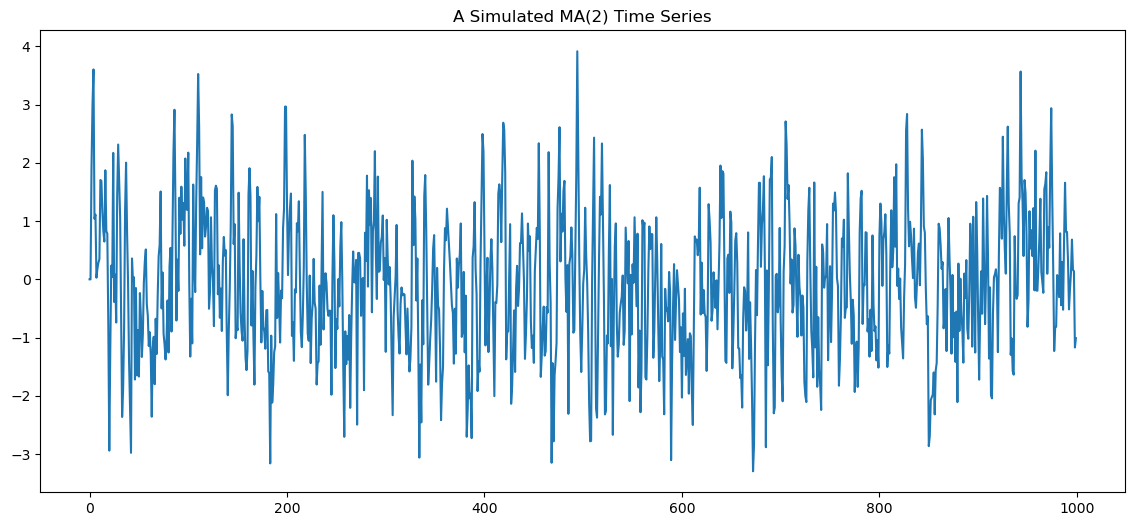

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机数种子以便结果可复现
np.random.seed(0)

# 生成长度为1000的白噪声序列
Z = np.random.normal(size=1000)

# 初始化MA模型的参数
theta = [0.6, 0.4]

# 初始化X
X = np.zeros_like(Z)

# 使用MA(2)模型生成X
for t in range(2, len(Z)):
    X[t] = Z[t] + theta[0]*Z[t-1] + theta[1]*Z[t-2]

# 绘制模拟的时间序列数据
plt.figure(figsize=(14, 6))
plt.plot(X)
plt.title("A Simulated MA(2) Time Series")
plt.show()


- 在这个例子中，我们创建了一个MA(2)模型，它使用过去两期的白噪声（通过$\epsilon[t-1]和 \epsilon[t-2]$表示）来生成当前的时间序列数据。这个模型的参数（theta）定义了过去的白噪声对当前时间序列数据的影响程度。生成的图形展示了一个典型的MA(2)模型的时间序列数据。

- AR模型是使用过去的实际值进行预测，而MA模型是使用过去的预测误差进行预测。即在实际计算时，MA模型规定$\epsilon$等同于模型的预测值与真实标签之间的差值（Residuals），即：
- $\theta_t=Y_t-\vec Y_t$
- MA模型使用预测标签与真实标签之间的差异就来代表“无法被预料、无法被估计、无法被模型捕捉的偶然事件的影响”。MA模型相信这些影响累加起来共同影响下一个时间点的标签值，因此$Y_t$
 等于所有$\epsilon$的线性组合（加权求和）。
- 在公式中，不同的系数$\theta$乘在每一个时间点的差值之前，表示不同时间点发生的各种偶然事件(白噪声)对真实标签值所产生的影响不同，$\theta_t$的前面没有需要求解的系数（即默认系数为1），这可能代表当前的“偶然事件”对$\theta_t$的标签的影响程度是100%。

### MA模型的前提假设
- 平稳性：MA模型假设时间序列是平稳的。这意味着序列的主要统计属性，如均值和方差，不随时间变化。这个假设强调了序列在长期内保持稳定的行为，而在短期内可能会受到随机因素的影响。

- 白噪声：MA模型假设存在一个白噪声序列。白噪声是随机误差项，它的均值为0，方差为常数，且各个时间点上的值是相互独立的。这个假设强调了在一段较短的时间内，时间序列的波动可能受到不可预测的随机因素的影响。

- 线性：MA模型假设时间序列可以被过去的白噪声项的线性组合表示。这就是模型被称为“移动平均”模型的原因，因为它的预测值是过去白噪声的加权平均。

- 有限历史影响：MA模型假设只有过去的q个白噪声才对当前时间点的值有影响，其中q是模型的阶数。换句话说，过去更久的白噪声对当前值没有直接影响。

- 标签值的关联性与白噪声的独立性：MA模型假设不同时间点的标签值之间是关联的，这反映了历史标签影响时间序列的长期趋势。而偶然事件在不同时间点上产生的影响（即白噪声）是相互独立的，这反映了在短期内，时间序列的波动可能受到不可预测的随机因素的影响。

### MA模型的建模流程
- 对于一个MA(q)模型，其形式表示为$Y_t=\mu+\epsilon_t+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_q\epsilon_{t-q}$
- MA(q)模型在时间区间[0,t]上进行训练，在时间区间[t+1,t+m]上进行预测，t tt为现在的时间点，则有：
- 训练求解$\theta$:在训练阶段，我们需要估计参数θ \thetaθ和白噪声序列ϵ \epsilonϵ。这是一个复杂的过程，因为白噪声项是未知的。一般来说，我们可以通过最大似然估计等方法来估计这些参数。参数估计完毕后，我们可以得到模型的残差，它将作为未来预测的一部分。

![image 3](3.png)

- 对于预测阶段，我们需要知道过去的白噪声序列。然而，这些白噪声项通常是未知的，所以我们通常用训练阶段估计出的残差作为过去的白噪声来进行预测。预测公式如下：

![image 4](4.png)

- 需要注意的是，这种方式主要是为了解释模型的原理，但在实际应用中，MA模型的预测误差项是未知的，因此需要通过复杂的方法估计。这也是为什么在实际应用中，我们通常使用ARMA（自回归移动平均）模型或者ARIMA（自回归整合移动平均）模型，因为这些模型可以更好地处理这种问题。
### 如何求解参数
- 对于移动平均模型（MA），需要一次性求解出所有的θ，这部分是在模型训练时完成的。但对于误差项ϵ，情况稍微复杂一些。在模型训练时，实际上是通过最小化残差（也就是观察值和模型预测值之间的差异）的方式来进行的。这就意味着，训练过程实际上就是在估算出一系列的ϵ，使得预测值与观察值之间的差异最小。然而，对于预测阶段，ϵ是未知的。通常，我们会假设在时间序列的未来部分，ϵ是零。然后，我们就能够使用我们的MA模型（及其估计出的θ参数）来进行预测。
- 在模型训练阶段，模型试图在给定观测数据的情况下，找出使模型误差最小的θ参数。在这个过程中，我们可以把ϵ看作是模型无法解释的部分，即模型的残差。模型训练阶段的目标就是找到一组θ参数，使得这些残差（即ϵ）尽可能的小。
- 然后，当模型训练完成，我们获得了θ参数后，我们就可以用这个模型去预测未来的数据。但是，因为ϵ是白噪声，也就是随机误差，所以在预测阶段我们无法准确知道未来的ϵ是什么。我们只能假设未来的ϵ的期望为0，因为这是白噪声的性质。

- 简单来说，θ是我们在训练阶段通过历史数据估计出来的，是模型的固定参数。ϵ是模型的随机部分，在训练阶段我们可以计算其值，但在预测阶段，我们只能假设其期望值为0。


## ARIMA

### 模型概述
- AR模型，即自回归模型，其优势是对于具有较长历史趋势的数据，AR模型可以捕获这些趋势，并据此进行预测。但是AR模型不能很好地处理某些类型的时间序列数据，例如那些有临时、突发的变化或者噪声较大的数据。AR模型相信“历史决定未来”，因此很大程度上忽略了现实情况的复杂性、也忽略了真正影响标签的因子带来的不可预料的影响。

- 相反地，MA模型，即移动平均模型，可以更好地处理那些有临时、突发的变化或者噪声较大的时间序列数据。但是对于具有较长历史趋势的数据，MA模型可能无法像AR模型那样捕捉到这些趋势。MA模型相信“时间序列是相对稳定的，时间序列的波动是由偶然因素影响决定的”，但现实中的时间序列很难一直维持“稳定”这一假设。

- 基于以上两个模型的优缺点，我们引入了ARIMA模型，这是一种结合了AR模型和MA模型优点的模型，可以处理更复杂的时间序列问题

- ARIMA模型，全称为自回归差分移动平均模型，是时间序列数据分析和预测的强大工具。它由自回归（AR）、差分（I）和移动平均（MA）三部分组成。ARIMA模型适用于平稳或非平稳但可转化为平稳的时间序列数据，能够捕捉长期趋势和季节性变化。
### 模型关键术语

- 自回归（AR）：想象一下，你正在预测明天的天气，你可能会参考今天、昨天甚至前几天的天气情况来做出预测，这种基于过去数据来预测未来的方法，就是自回归的思想。在ARIMA模型中，自回归部分就是使用过去的时间序列值来预测当前或未来的值。

- 差分（I）：有时候，时间序列数据并不稳定，比如有明显的上升或下降趋势，为了让数据变得稳定，我们可以对它进行差分处理。简单来说，差分就是计算相邻时间点上的数据差异。通过差分，我们可以消除趋势和季节性变化，使得数据更容易被模型捕捉和预测。

- 移动平均（MA）：移动平均是一种平滑技术，用于减少时间序列数据中的随机波动，在ARIMA模型中，移动平均部分使用过去的预测误差（即实际值与预测值之间的差异）来修正当前的预测。这样做可以使得预测结果更加平滑和准确。

### 数学表达

- 如果我们暂时不考虑差分（即假设d=0），那么ARIMA模型可以被看作是AR模型和MA模型的直接结合，形式上看，ARIMA模型的公式可以表示为：
- $Y_t=c+\phi_1Y_{t-1}+\phi_2Y_{t-2}+...\phi_pY_{t-p}+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+...+\theta_q\epsilon_{t-q}$
- $ Y_t$是我们正在考虑的时间序列数据
- $\phi_1...\phi_p$是AR模型的参数，这些参数用来描述当前值与过去p个时间点值之间的关系。
- $\theta_1...\theta_p$是MA模型的参数，这些参数用来描述当前值与过去q个时间点的误差之间的关系。
- $\epsilon_t$是在t时间点的误差项。
- $c$是一个常数项。MA模型中代表长期趋势的均值μ并不存在于ARIMA模型的公式当中，因为ARIMA模型中“预测长期趋势”这部分功能由AR模型来执行，因此AR模型替代了原本的μ。在ARIMA模型中，c可以为0。

### 差分过程I的详解

- 差分是一种数学操作，用于计算一组数值序列中相邻数据点的差值。在时间序列分析中，差分常用于将非平稳序列转化为平稳序列，也就是减小或消除时间序列的趋势和季节性变化
- 差分的过程：
    1.原始序列：$Y_1,Y_2,Y_3,...,Y_t,...$
    2.一阶差分：$\Delta Y_t=Y_t-Y_{t-1}$
    3.二阶差分：$\Delta^2 Y_t=\Delta Y_t-\Delta Y_{t-1}$
    ...
- 差分后的序列比原序列短了一位，因为差分操作实际上计算的是原序列中的相邻数据点之间的差值。同时，差分后的序列相比于原序列，其趋势和季节性变化都得到了一定程度的消除。通常进行一次差分运算，原始的序列会变短1个单位。
- 我们可以改变差分运算的两个相关因子来执行不同的差分：一个是差分的阶数（order），另一个是差分的滞后（lag）。
- 正常的一阶差分是滞后为1的差分（lag-1 Differences），这代表在差分运算中，我们让相邻的两个观测值相减，即让间隔为（lag-1）的两个观测值相减。因此，当滞后为2时，则代表我们需要让相隔1个值的两个观测值相减。
- 在ARIMA模型中，我们经常需要计算滞后d期的时间序列数据。这就意味着我们需要查找在t时刻前d个时间单位的数据。
- 如果我们想要计算这个时间序列的一阶滞后序列，我们只需要将原序列向右移动一个单位，然后删除掉移动后超出的数据点。这样，我们就得到了一阶滞后序列。
- 滞后差分（Lag Differences）是在进行差分操作时，不是用相邻的观测值进行相减，而是用相隔一定数量（即滞后数量）的观测值进行相减。这种操作通常在时间序列具有周期性的情况下非常有用，例如，当我们处理的数据随季节有规律地波动或者随一周的时间有规律地波动时。

在时间序列中，标签往往具备一定的周期性：例如，标签可能随季节有规律地波动（比如在夏季标签值高、在冬季标签值较低等），也可能随一周的时间有规律地波动（比如在周末较高、在工作日较低等）。这种波动可以通过滞后差分来消除，我们生成一个人造的不平稳时间序列，并通过差分使其平稳。我们将利用Numpy和Pandas库生成这个序列，然后用同样的步骤进行检验和可视化。代码如下：


Results of Dickey-Fuller Test:
Test Statistic                 -1.132038
p-value                         0.702128
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.158402e+00
p-value                        2.572287e-15
#Lags Used                     0.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -5.459820
p-value                         0.000003
#Lags Used                     11.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.58

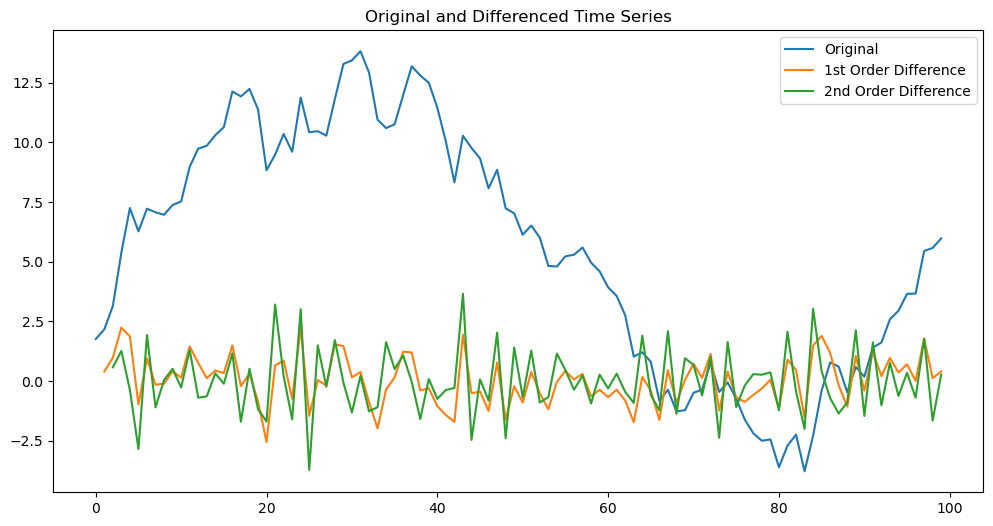

In [2]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
 
# 创建一个函数来检查数据的平稳性
def test_stationarity(timeseries):
    # 执行Dickey-Fuller测试
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# 生成不平稳的时间序列
np.random.seed(0)
n = 100
x = np.cumsum(np.random.randn(n))

# 把它转换成Pandas的DataFrame格式
df = pd.DataFrame(x, columns=['value'])

# 检查原始数据的平稳性
test_stationarity(df['value'])

# 进行一阶差分
df['first_difference'] = df['value'] - df['value'].shift(1)

# 检查一阶差分后的数据的平稳性
test_stationarity(df['first_difference'].dropna())

# 进行二阶差分
df['second_difference'] = df['first_difference'] - df['first_difference'].shift(1)

# 检查二阶差分后的数据的平稳性
test_stationarity(df['second_difference'].dropna())

# 可视化原始数据和差分后的数据
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Original')
plt.plot(df['first_difference'], label='1st Order Difference')
plt.plot(df['second_difference'], label='2nd Order Difference')
plt.legend(loc='best')
plt.title('Original and Differenced Time Series')
plt.show()



- 这段代码首先创建了一个不平稳的时间序列。然后，它对原始数据、一阶差分数据和二阶差分数据进行了平稳性检验。最后，它画出了原始数据以及一阶和二阶差分数据的图形。
- 在你运行这段代码之后，你应该会看到，原始数据不平稳，一阶差分后的数据仍然不完全平稳，而二阶差分后的数据就已经变得平稳了。

### 概念总结

- 差分（Differencing）：这是一种预处理技术，用于使非平稳时间序列变得平稳。在时间序列中进行一阶差分，就是将每个观察值与其前一步的观察值进行比较，然后取这两个观察值之间的差异。
- 滞后差分（Lagged Differencing）：这个术语和"差分"非常相似。当我们说"滞后"时，我们是在说比较一个观察值和其"前一步"或"几步前"的观察值。因此，“滞后一阶差分"实际上就是常规的一阶差分，因为我们比较的是每个观察值与其前一步的观察值。如果我们进行的是"滞后k阶差分”，那么我们比较的是每个观察值与其k步前的观察值。
- n阶差分（n-th Order Differencing）：n阶差分是差分的一种更一般的形式。一阶差分是比较每个观察值与其前一步的观察值，二阶差分是对一阶差分序列进行再一次的差分（也就是比较一阶差分序列中的每个值与其前一步的值）。更一般地，n阶差分就是连续进行n次一阶差分。 
- 多步差分（Multi-step Differencing）：这个术语可能根据上下文有不同的含义。它可能指的是n阶差分（即进行多次连续的一阶差分）。也可能指的是滞后差分，比如比较每个观察值与其几步前的观察值。

### ACF与PACF
- 当我们说一个时间序列是平稳的，基本上意味着其统计特性（如均值，方差）在时间上是常数或不会随时间变化。平稳性是ARIMA模型所假设的关键特性，因为模型的预测能力在很大程度上取决于这个假设。
- 我们生成1000个数据点的平稳和非平稳时间序列。在非平稳序列中，我们增加了一个正弦项，以产生更明显的波动。这样，就可以看到一个具有明显周期性和变化幅度的非平稳序列

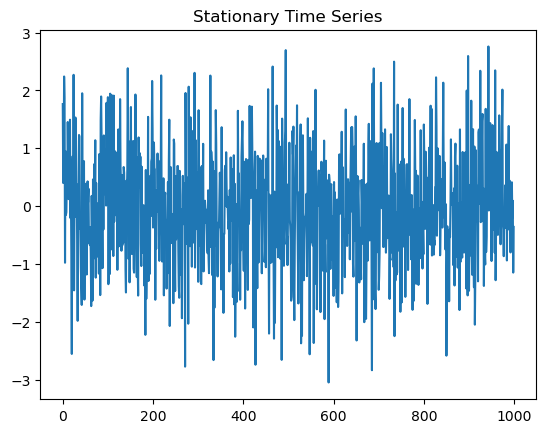

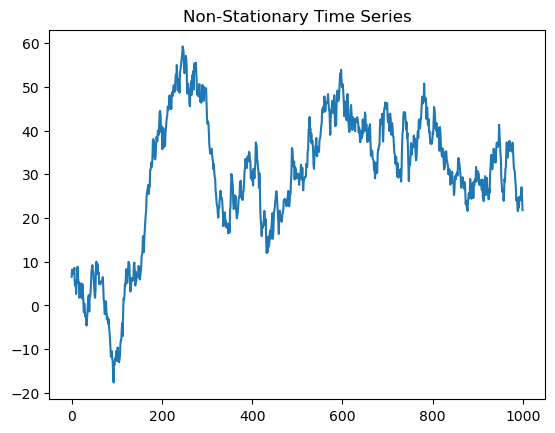

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复
np.random.seed(0)

# 生成平稳时间序列
stationary = np.random.normal(loc=0, scale=1.0, size=1000)
s_ts = pd.Series(stationary)
s_ts.plot()
plt.title('Stationary Time Series')
plt.show()

# 生成非平稳时间序列
non_stationary = np.cumsum(np.random.normal(loc=0, scale=2.0, size=1000)) + 10 * np.sin(np.linspace(-10, 10, 1000))
ns_ts = pd.Series(non_stationary)
ns_ts.plot()
plt.title('Non-Stationary Time Series')
plt.show()


- 在第一幅图中，我们看到的序列有一个明显的周期性波动模式。这个序列的均值和方差都在随时间变化。均值在随时间变化是因为我们在生成这个序列时，将随机数进行了累加；方差在随时间变化是因为我们增加了一个正弦项，使得序列在不同的时间点具有不同的波动幅度。这些性质都违反了平稳时间序列的定义，所以我们称这个序列为非平稳时间序列。

- 在第二幅图中，我们可以看到序列在0附近随机波动。这个序列的均值和方差都是常数。均值是因为我们在生成这个序列时，从均值为0的正态分布中抽取了随机数；方差也是常数，因为这些随机数是独立同分布的。这些性质都满足平稳时间序列的定义，所以我们称这个序列为平稳时间序列。

- 在时间序列分析中，我们通常需要将非平稳时间序列转化为平稳时间序列，因为许多时间序列模型（如AR、MA和ARIMA模型）都假设输入的数据是平稳的。这种转化可以通过差分或其他预处理方法来实现。

### 自相关函数ACF (Auto-Correlation Function)
- 一般来说，"相关性"用于衡量两个变量之间的线性关系。对于时间序列数据，这两个变量通常是在不同时间点的观测值。
- 在实际应用中，ACF通常被定义为当前时间点上的观测值与历史时间点观测值之间的相关性。这种相关性可以用多种方法来衡量，其中最常用的是皮尔逊相关系数。
- 这是一个相对宽泛的定义，而在时间序列分析中，ACF有着更为严格的定义。对于任意的滞后（lag）k，我们都计算出在时间t和时间t+k的数据点之间的协方差，然后除以该时间序列的方差。这样得到的结果反映了时间序列自身的相关性。
- 如果我们有一个时间序列 {X_t}，那么对于任意的滞后（lag）k，自相关函数 ρ(k) 可以表示为：
- $ρ(k)=\frac{Cov(X_t,X_{t+k})}{Var(X_t)}$
- ACF 的取值范围是 -1 到 1。当 ACF 接近 1 时，表示两个时间点的观测值高度正相关；当 ACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 ACF 接近 0 时，表示两个时间点的观测值之间的相关性较弱。
- 通过计算不同滞后值下的 ACF，我们可以得到一个关于滞后的函数，这就是自相关函数。我们通常使用自相关图（ACF 图）来直观地表示这个函数，这将在后面的内容中详细介绍。

### 偏自相关函数PACF (Partial Auto-Correlation Function)
- 直接相关性是指一个变量与另一个变量之间的相关性，而不考虑其他变量的影响。
- 在时间序列分析中，偏自相关函数（PACF）衡量的是在其他更早期的滞后（lag）观测值已经被考虑后，当前时间点的观测值与某个滞后观测值之间的"直接相关性"。换句话说，PACF表示的是两个观测值之间的相关性，去掉其他滞后观测值的影响。
- 如果我们有一个时间序列 {X_t}，那么对于任意的滞后（lag）k，偏自相关函数 φ(k) 可以表示为： 
- $φ(k)=\frac{Cov(X_t-E[X_t|X_{t-1},...X_{t-k+1}],X_{t-k}-E[X_{t-k}|X_{t-k+1},...X_{t-1}])}{Var(X_t)}$
- 其中，Cov表示协方差，E表示期望，也就是平均值，Var表示方差。我们可以看到，PACF的计算过程实际上是先去掉其他更早期的滞后观测值的影响，然后再计算相关性。
- PACF的取值范围也是 -1 到 1。当 PACF 接近 1 时，表示两个时间点的观测值高度正相关；当 PACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 PACF 接近 0 时，表示两个时间点的观测值之间的直接相关性较弱。
- 通过计算不同滞后值下的 PACF，我们可以得到一个关于滞后的函数，这就是偏自相关函数。我们通常使用偏自相关图（PACF 图）来直观地表示这个函数，这将在后面的内容中详细介绍。



### 用一个例子解释ACF和PACF
- 假设我们在观察一个湖泊的水温。假设我们每天都在固定的时间测量水温，并记录下来。
- 自相关系数（ACF）： 自相关就好比我们在考虑"今天的水温是否会受到昨天水温的影响？"如果昨天的水温很高，那么今天的水温可能也会偏高。这种相互影响可以用自相关系数来衡量。换句话说，自相关系数可以帮助我们理解在时间序列中，一个时间点的值如何影响另一个时间点的值。

- 偏自相关系数（PACF）： 偏自相关在这个例子中，可以被理解为"在已知昨天水温的情况下，今天的水温还会受到前天水温的影响吗？“也就是说，我们在计算今天和前天的水温关系时，已经考虑并剔除了昨天水温的影响。这种关系被称为"偏自相关”。

- ACF和PACF的取值范围都是[-1,1]，其中1代表两个序列完全正相关，-1代表两个序列完全负相关，0代表两个序列不相关。
- 我们生成一个AR(1)模型的时间序列数据，然后使用statsmodels库中的plot_acf和plot_pacf函数来绘制其自相关函数（ACF）和部分自相关函数（PACF）的图像。以下是Python代码：


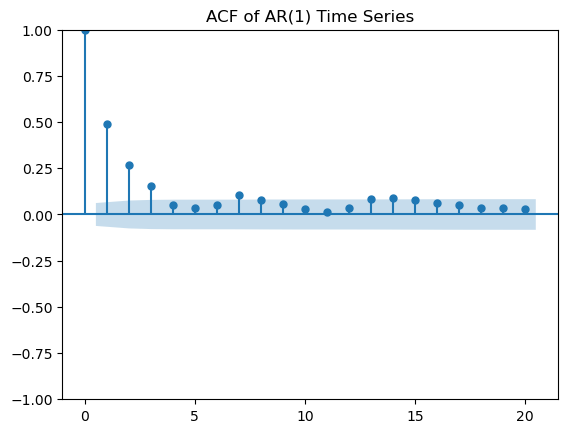

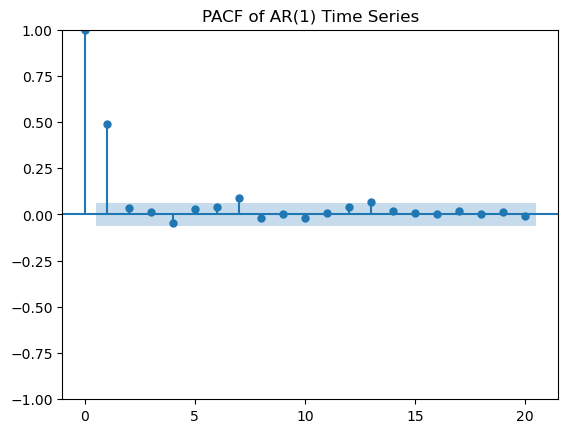

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# 设置随机种子以确保结果可重复
np.random.seed(0)

# 生成AR(1)时间序列数据
ar = np.array([1, -0.5])  # 我们将使用的AR模型的参数
ma = np.array([1])  # 这是MA模型的参数，在这个例子中我们不需要它
n = int(1000)  # 我们将生成的数据点的数量

arma_process = sm.tsa.ArmaProcess(ar, ma)
y = arma_process.generate_sample(nsample=n)

# 绘制ACF图像
plot_acf(y, lags=20)
plt.title('ACF of AR(1) Time Series')
plt.show()

# 绘制PACF图像
plot_pacf(y, lags=20)
plt.title('PACF of AR(1) Time Series')
plt.show()


- ACF图和PACF图的横坐标相同，都是不同的滞后程度，纵坐标是当前滞后程度下序列的ACF和PACF值。背景为蓝色的区域代表着95%或99%的置信区间，当ACF/PACF值在蓝色区域之外时，我们就认为当前滞后程度下的ACF/PACF是统计上显著的值，即这个滞后程度下的序列之间的相关性很大程度上是信任的、不是巧合。需要注意的是，当滞后为0时，ACF和PACF值必然为1，因为一个序列与自己始终完全相关，因此ACF和PACF图上有意义的值是从滞后为1的值开始看
- ACF衡量的是时间序列与其自身滞后版本之间的相关性。对于AR(1)模型，其ACF应在滞后1时有一个峰值，然后逐渐衰减。原因是，当滞后1时，我们实际上在比较X[t]和X[t-1]，它们是直接相关的，所以有一个峰值。而当滞后增加时，比如滞后2时，我们在比较X[t]和X[t-2]，虽然X[t]和X[t-2]之间存在间接的关联（通过X[t-1]），但是这种关联会随着滞后的增加而衰减。
- 部分自相关函数（PACF）：PACF衡量的是时间序列与其滞后版本之间的相关性，但是要剔除中间滞后项的影响。对于AR(1)模型，其PACF应在滞后1时有一个峰值，然后突然降到0。原因是，当滞后1时，我们实际上在比较X[t]和X[t-1]，它们是直接相关的，所以有一个峰值。而当滞后增加时，比如滞后2时，我们在比较X[t]和X[t-2]，尽管它们之间存在间接的关联，但是这种关联被X[t-1]的影响所剔除，所以PACF在滞后2以后的值应接近于0。

### 不同的p,d,q可以决定模型的类型
- AR模型（Autoregressive Model）：ARIMA(p,0,0)自回归模型，它将当前值与过去p个值的线性组合进行比较。
- MA模型（Moving Average Model）：ARIMA(0,0,q)移动平均模型，它将当前值与过去q个误差项的线性组合进行比较。
- ARMA模型（Autoregressive Moving Average Model）：ARIMA(p,0,q)自回归移动平均模型，它是AR模型和MA(q)模型的组合。
- ARIMA模型（Autoregressive Integrated Moving Average Model）：ARIMA(p,d,q)自回归积分移动平均模型，它是ARMA(p, q)模型的扩展，增加了差分的步骤，使得非平稳序列变得平稳。
- IMA模型（Integrated Moving Average Model）：ARIMA(0,d,q)积分移动平均模型，它是MA(q)模型的扩展，增加了差分的步骤，使得非平稳序列变得平稳。


### 对于AR模型，ACF会展现出拖尾的形式，而PACF则在p阶后突然截尾。
- 对任意时间序列，当ACF图像呈现拖尾、且PACF图像呈现截尾状态时，当前时间序列适用AR模型，且PACF截尾的滞后阶数就是超参数p的理想值，如图：

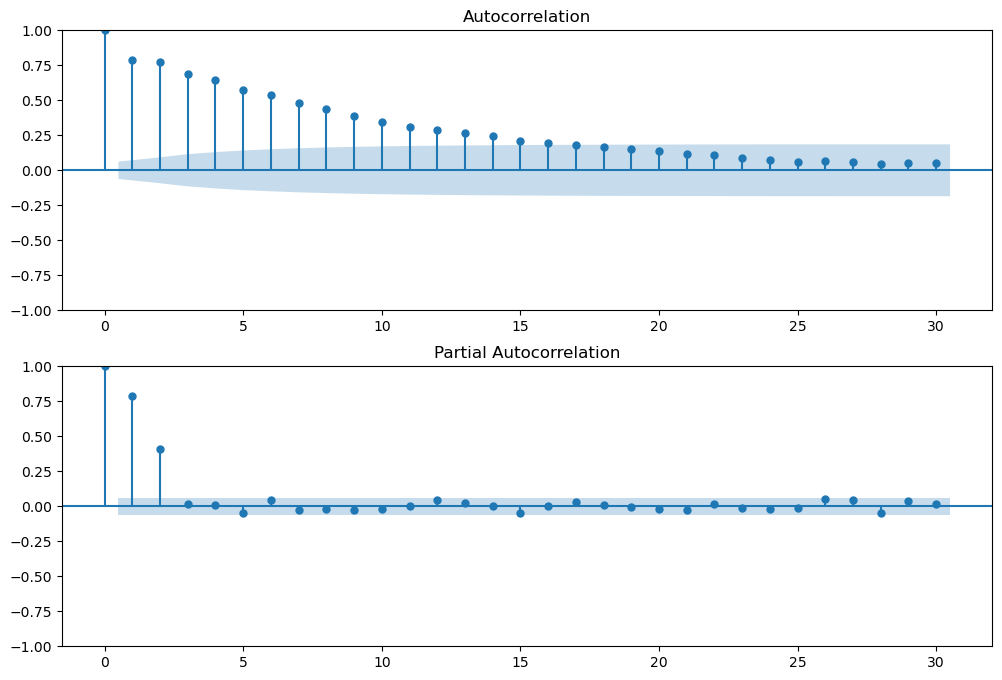

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 参数
ar = np.array([1, -0.5, -0.4])
ma = np.array([1])

# 生成AR(2)过程
ar2_process = ArmaProcess(ar, ma)
ar2_sample = ar2_process.generate_sample(nsample=1000)

# 绘制ACF和PACF
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(ar2_sample, ax=plt.gca())
plt.subplot(212)
plot_pacf(ar2_sample, ax=plt.gca())
plt.show()


### 对于MA模型，ACF在q阶后突然截尾，而PACF则呈现拖尾的形式
- 对任意时间序列，当PACF图像呈现拖尾、且ACF图像呈现截尾状态时，当前时间序列适用MA模型，且ACF截尾的滞后阶数就是超参数q的理想值
- 对于MA模型，PACF的拖尾可能不会很明显，这主要是因为在实际的样本数据中，PACF可能会受到噪声的影响。不过，在理论上，MA(q)模型的PACF应该在q阶后展现出拖尾的特性。

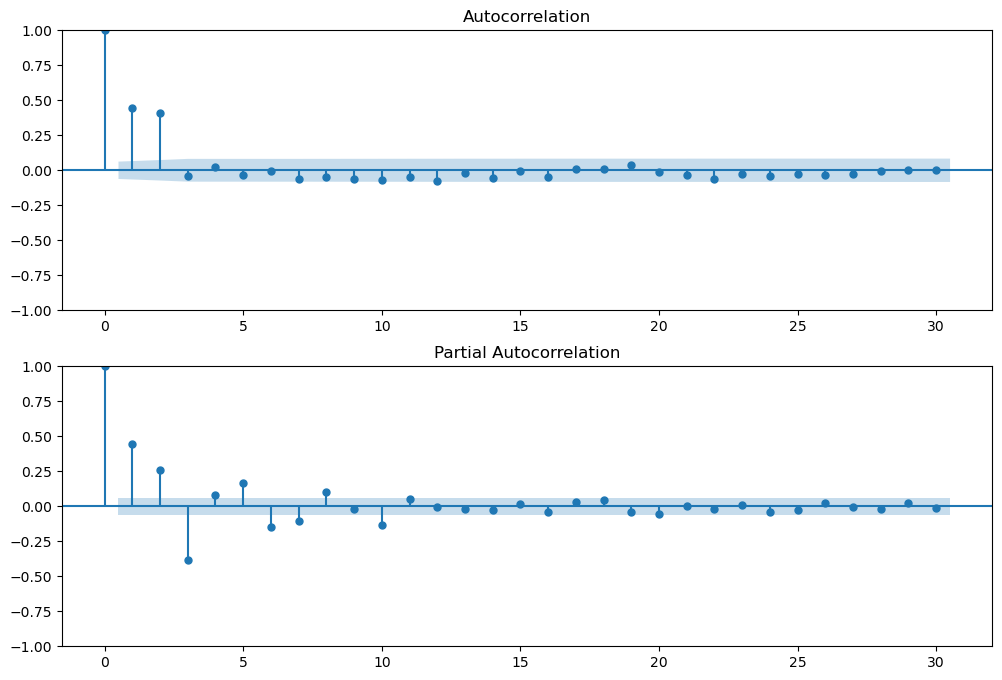

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 定义MA模型的参数
ar = np.array([1])
ma = np.array([1, 0.5, 0.7])
np.random.seed(1)

# 创建ARMA模型
arma_process = ArmaProcess(ar, ma)
sample = arma_process.generate_sample(nsample=1000)

# 绘制ACF和PACF图
plt.figure(figsize=(12,8))
plt.subplot(211)
plot_acf(sample, ax=plt.gca(), lags=30)
plt.subplot(212)
plot_pacf(sample, ax=plt.gca(), lags=30)
plt.show()

